## Pendulum Model

$$\frac{d^2\theta}{dt^2}+\frac{1}{q}\frac{d\theta}{dt}+\frac{g}{l}\sin\theta=f(t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [159]:
class pendulum:
    def __init__(self):
        self.g=9.81  # m/s^2
        self.q=100   # s
        self.l=self.g     # m
        
    def dxdt(self,w,theta,f):
        """
        pendulum state equation
        """
        g=self.g
        q=self.q
        l=self.l
        state = np.array([-w/q-g*np.sin(theta)/l+f, w])
        return state
    
    def L(self,w,theta,f,dt):
        """
        pendulum forward model
        """
        g=self.g
        q=self.q
        l=self.l
        state = np.array([(1-dt/q)*w - (g*np.sin(theta)/l + f)*dt, dt*w+theta]) # appendix has +f, should be -f? doesnt matter?
        return(state)

    def A(self,theta,dt):
        """
        pendulum tangent linear model
        """
        g=self.g
        q=self.q
        state=np.array([1-dt/q,-g*np.cos(theta)*dt/l],[dt,1])
        
        return state
    
    def B(dt):
        """
        B=dL/df(t)
        """
        state=np.array([dt,0])
        return state

(-180.0, 180.0)

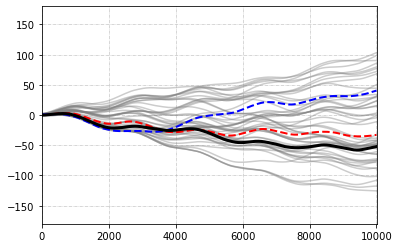

In [161]:
# initialize force parameters
b=1.5   # rad/s^2
wd=2/3  # 1/s

# initialize run parameters
T=50
N=10001
dt=T/N
nTrials=50

# initialize uncertainties
sigma_w=0.5
sigma_theta=1

# initialize pendulum
p=pendulum()

# run nTrials, the number of forward runs
for n in range(nTrials):
    # initialize w, theta so that after n=0, we perturb the ICs
    w,theta=[0,0] + (n>0)*np.array([np.random.normal(sigma_w),np.random.normal(sigma_theta)])
    savetheta=np.zeros(N)
    # forward model
    for i in range(N):
        t=(i+1)*dt
        #print("i={},t={}, f={}, w={}, theta={}".format(i,t,f,w,theta))
        f=b*np.cos(wd*t)
        w,theta=p.L(w,theta,f,dt)
        savetheta[i]=theta
    if n==0:    
        savetheta0=savetheta
    else:
        plt.plot(savetheta,color='grey',alpha=0.4)
        
        
        
        
# initial angle known, initial angular velocity unknown
w,theta=[0,0] + np.array([np.random.normal(sigma_w),0])
savetheta=np.zeros(N)
for i in range(N):
    t=(i+1)*dt
    #print("i={},t={}, f={}, w={}, theta={}".format(i,t,f,w,theta))
    f=b*np.cos(wd*t)
    w,theta=p.L(w,theta,f,dt)
    savetheta[i]=theta
plt.plot(savetheta,'r--',linewidth=2)

    
    
    
# initial angle unknown, initial angular velocity known
w,theta=[0,0] + np.array([0,np.random.normal(sigma_theta)])
savetheta=np.zeros(N)
for i in range(N):
    t=(i+1)*dt
    #print("i={},t={}, f={}, w={}, theta={}".format(i,t,f,w,theta))
    f=b*np.cos(wd*t)
    w,theta=p.L(w,theta,f,dt)
    savetheta[i]=theta
plt.plot(savetheta,'b--', linewidth=2)



# plot TRUTH, i.e. initial condition [w,theta]=[0,0]
plt.plot(savetheta0,color='black',linewidth=3)
plt.grid(linestyle='-.',linewidth=0.5)
plt.xlim([0,N])
plt.ylim([-180,180])